
<h1><b>Statistique en Bioinformatique : </b> TME1 </h1>
<br>
L’objectif de ce TME est l’analyse statistique d’une famille de protéines à travers son alignement de séquences:
<br>
<ul>
<li> objectif 1: détection des positions conservées, </li>
<li> objectif 2: détection de séquences qui appartiennent à la même famille, </li>
</ul>
<vr>
<div class="alert alert-warning" role="alert" style="margin: 10px">
<p>**Soumission**</p>
<ul>
<li>Renomer le fichier TME1.ipynb pour NomEtudiant1_NomEtudiant2.ipynb </li>
<li>Envoyer par email à nikaabdollahi@gmail.com, l’objet du email sera [SBAS-2019] TME1</li>
</ul>
</div>

Nom etudiant 1 :
<br>
Nom etudiant 2 :
<br>

<b>DONNÉES</b> <br>
Il y a 2 fichiers avec les données telecharché à (<a href="http://www.lcqb.upmc.fr/julianab/teaching/SBAS/TME1.tar.gz"> TME1 </a> ): <br>
<ul>
<li> Dtrain.txt: C’est un alignement de M = 5643 protéines d’une seule famille en format FASTA,
<br>
    Lignes qui commencent avec “>” contiennent des commentaires (nome de la protéine etc.). Elles n’ont aucune importance pour notre projet. Les autres lignes contiennent les séquences, que l’on va utiliser dans le projet. Les séquences sont alignées, elles ont toutes la même longueur (L = 48 positions dans notre fichier). Chaque position i = 0, ..., L − 1 d'une séquence contient ou une acide aminé (A,C,...,Y, il y en a 20) ou un trou (–), que l'on considère comme 21ème lettre. Ensemble elles forment l'alphabet: 
    A =  {A, C, D, E, F, G, H, I, K, L, M, N, P, Q, R, S, T, V, W, Y, -}, avec q = 21 lettres différentes.
</li>
    <br>
<li> testseq.txt:  testseq.txt: Même format de Dtrain.txt, mais avec une seule séquence b = (b0 , ..., bN −1 ) plus longue (longueur N = 114 > L). On va scanner cette séquence pour trouver une sous-séquence qui appartient à la famille definie par Dtrain.txt. </li>
</ul>

Exercise 1: Pour chaque position du alignement i = 0, ..., L − 1 et chaque acide aminée a ∈ A (le trou compris), calculer le nombre d’occurence ni(a) et le poid ωi(a), òu : <br>
\begin{equation*}
\label{eq1}
n_{i}(a) = \textrm{nombre d’occurences d’acide aminée a en position (colonne) i}.
\end{equation*}

<br>
\begin{equation*}
\omega_i(a) = \frac{n_i(a)+1}{M+q}\ .
\end{equation*}

In [2]:
import sys
import numpy as np
from Bio import AlignIO
aa = ['A', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W', 'Y', '-']
q = 21
#aa = ['A', 'B', 'C', '-']
#q = 4
#aa = ['A', 'G', 'C', 'T', '-']
#q = 5

In [3]:
#load path Files
input_dataset_f = 'Dtrain.txt'
input_sequence_f = 'test_seq.txt'
#input_dataset_f = 'DtrainToy.txt'
#input_sequence_f = 'test_seqToy.txt'
#input_dataset_f = 'DtrainToyTD.txt'

In [4]:
#load DTrain File
alignment = AlignIO.read(open(input_dataset_f), "fasta")

sequences = []
for record in alignment :
    sequences.append(record.seq)


In [5]:
#Computing wi(a)
M = 5643
size = len(sequences[0])
occ = np.zeros((q,size))
w = np.zeros((q, size))

for i in range(size):
    for a in aa:
        id_a = aa.index(a)
        for seq in sequences:
            if(seq[i] == a):
                occ[id_a][i] = occ[id_a][i] + 1
        w[id_a][i] = (occ[id_a][i] + 1) / (M + q)
  
print(w)
            

[[1.76553672e-04 7.25282486e-01 1.02401130e-02 ... 3.42514124e-02
  1.76553672e-04 2.38170904e-01]
 [1.76553672e-04 1.76553672e-04 1.94209040e-03 ... 7.59180791e-03
  1.76553672e-04 1.69491525e-02]
 [1.76553672e-04 1.76553672e-04 3.53107345e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 ...
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.76553672e-04
  1.76553672e-04 1.76553672e-04]
 [1.76553672e-04 1.76553672e-04 1.76553672e-04 ... 1.78319209e-02
  1.76553672e-04 1.76553672e-04]
 [3.13206215e-01 1.55367232e-01 8.20974576e-02 ... 5.66737288e-02
  6.77966102e-02 3.53460452e-01]]


Exercise 2: Trouvez les positions les plus conservées en utilisant l’entropie relative.
<br>
2.1) Pour chaque position i = 0, ..., L − 1, determiner l’entropie relative Si<br>
\begin{equation*}
\label{eq:entropie}
S_i = \log_2(q) + \sum_{a\in {\cal A}} \omega_i(a)\cdot \log_2\left[\omega_i(a) \right]\ .
\end{equation*}
<br>


In [6]:
#Computing Si
s = np.zeros((size))
sub_term = 0
             
for i in range(size):
    sub_term = 0
    for a in aa:
        id_a = aa.index(a)
        sub_term += w[id_a][i] + np.log2(w[id_a][i])
    s[i] = np.log2(q) + sub_term

print(s)


[-191.33248876 -216.8725622  -151.97298133 -149.54111566 -151.29791523
 -192.41507424 -110.50634306 -154.29398832 -111.73147314 -106.84847872
 -127.6899307  -126.0267491  -160.37741566 -188.03246251 -134.04568162
 -189.531317   -111.72509739 -132.49121449 -183.00924115 -163.31067199
 -116.45054826 -193.47158488 -110.07543985 -158.810449   -130.1815875
 -125.48076997 -106.00411669 -104.51699147 -117.24536107 -119.13605641
 -139.903666   -222.08280471 -151.69474973 -110.81195403 -188.86561726
 -117.52836109 -107.26863265 -101.02409965 -119.3074337  -150.46869826
 -141.35318671 -110.2449532  -111.46182282 -202.00764379 -136.2212026
 -181.51637126 -234.48158954 -187.6583978 ]


2.2) Indiquez les acides aminees (ai*) des trois positions les plus conservées : 
\begin{equation}
\label{eq:conserved}
a_i^\star = {\rm argmax}_{a\in {\cal A}} \omega_i(a)\ .
\end{equation}

In [7]:
#computing ai*

ai = np.zeros(size)
w = w.T

for i in range(size):
    ai[i] = w[i].argmax()

ai.sort()
ai = ai[::-1]


print(aa[np.asscalar(ai[0].astype(int))], aa[np.asscalar(ai[1].astype(int))], aa[np.asscalar(ai[2].astype(int))])

w = w.T


- - -


2.3) Tracer l’entropie rélative en fonction de chaque position i.

In [8]:
import matplotlib.pyplot as plt


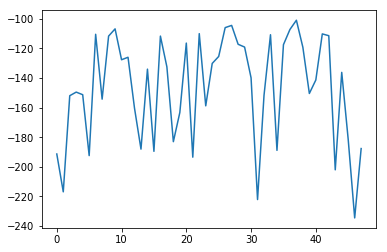

In [9]:
#plot entropy

points = range(size)

plt.plot(points, s)

Exercise 3: Déterminer les paramètres f(0)(b) du modèle nul, où
\begin{equation}
f^{(0)}(b) = \frac 1L \sum_{i=0}^{L-1} \omega_i(b)\ ,
\end{equation}

In [10]:
#computing f0

b_sequences = []
with open(input_sequence_f, "r") as f:
    next(f)
    for line in f:
        b_sequences = line.strip()

f0 = []
sum_w = 0
L = size
N = len(b_sequences)

for b in range(N):
    id_b = aa.index(b_sequences[b])
    if(b+L == N):
        break
    for i in range(L):
        sum_w += w[id_b][i]
    f0.append( sum_w / L )

print(f0)


[0.03793329213747646, 0.07586658427495284, 0.13467366996233512, 0.19348075564971753, 0.25228784133709986, 0.29022113347457645, 0.32453139712806056, 0.3624646892655367, 0.4136027248116758, 0.49851768479284303, 0.5364509769303191, 0.5815126235875694, 0.6200675317796598, 0.671205567325799, 0.7300126530131816, 0.8044631297080973, 0.8430180379001874, 0.9231071975047076, 0.9650497292843688, 1.0238568149717515, 1.114336893832392, 1.1486471574858759, 1.1970853931261778, 1.2558924788135604, 1.346372557674201, 1.4312875176553683, 1.5057379943502838, 1.554176229990586, 1.6286267066855016, 1.7191067855461428, 1.770244821092282, 1.8503339806968022, 1.9352489406779696, 1.9857396127589488, 2.036230284839928, 2.1106807615348435, 2.1698409545668595, 2.2105660016478397, 2.244876265301324, 2.2960143008474634, 2.3809292608286308, 2.416574711629008, 2.452220162429385, 2.5427002412900266, 2.5792983462806123, 2.615896451271198, 2.6903469279661127, 2.749154013653492, 2.7975922492937912, 2.842653895951042, 2.9

Exercise 4: (à appliquer à testseq.txt): Déterminer l(bi,...,bi+L−1)  pour chaque sous-séquence de longueur L. 
Déterminer si il y a des sous-séquences de la famille definie par Dtrain. 
Tracer la log-vraisemblance en fonction de sa première position i = 0, ..., N − L.
\begin{equation}
\label{eq:ll}
\ell(b_0,...,b_{L-1}) = \log_2 \frac {P(b_0,...,b_{L-1} | \omega )
}{P^{(0)}(b_0,...,b_{L-1})}
= \sum_{i=0}^{L-1} \log_2 \frac {\omega_i(b_i)}{f^{(0)}(b_i)}\ .
\end{equation}

4.1: Faites une fonction pour calculer la log-vraisemblance, d'une sequence de taille L.

In [11]:
#computing loglikehood

def loglikellyhood(seq, w, f0):
    somme = 0
    for i in range(len(seq)):
        id_b = aa.index(seq[i])
        somme += np.log2( w[id_b][i] / f0[i])
    return somme

4.2: Faites une fonction qui etant donner une sequence de taille superieur à L generer toutes les sous-séquences de taille L  

In [12]:
#computing sliding_window 

def sliding_windows(seq, L):
    sequences = []
    if(len(seq) <= L):
        sequences.append(seq)
        return sequences
    for i in range(len(seq)):
        if(i+L == len(seq)):
            return sequences
        subset = ""
        for c in range(i, i+L):
            subset += seq[c]
        sequences.append(subset)
    return sequences

4.3: Calculer la log-vraisemblance pour toutes les sous-sequences trouvé à 4.2 et tracer un graphique de log-vraisemblance x position initialle de la sous-sequence.

In [13]:
#computing log-vraisemblance

seqs = sliding_windows( b_sequences, L)
logs = np.zeros(len(seqs))
i = 0
for seq in seqs:
    logs[i] = loglikellyhood(seq, w, f0)
    i+=1

print(logs)

[-316.40115079 -317.22272541 -298.78122315 -319.20597668 -361.10172981
 -329.37524688 -316.74283167 -353.32829415 -367.45133168 -340.29503599
 -353.62798104 -294.23059349 -317.4265042  -124.77099284 -336.72409552
 -328.49105142 -350.24798129 -360.30461085 -344.42816305 -341.92638247
 -338.95560302 -346.92410421 -322.80675449 -314.70865657 -350.71214359
 -329.75249695 -304.83108013 -360.13941271 -345.61124483 -336.36416601
 -345.99515854 -340.42778514 -326.91548865 -329.88352808 -358.01685513
 -335.970497   -332.75613264 -349.62052793 -331.0097845  -329.90201851
 -366.12320057 -321.5635796  -333.07759566 -347.53557625 -288.30087686
 -325.7972881  -307.42510456 -309.88272965 -335.89565192 -345.85235169
 -345.78590279 -314.03182027 -343.50393245 -337.32345738 -349.34574139
 -337.18482808 -368.04013222 -323.89147086 -335.9447745  -356.09173048
 -329.40218965 -335.81346265 -353.49772239 -366.98558373 -333.26652402
 -343.27136654]


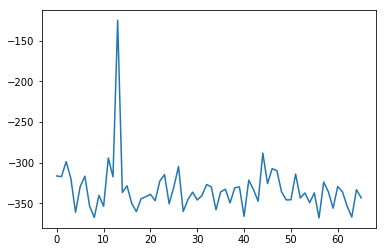

In [14]:
#ploting  log-vraisemblance x position initialle

pos_ini = range(len(logs))
plt.plot(pos_ini, logs)